# Test of neural network
By: Magnus Kvåle Helliesen

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from neural_network.neural_network import NeuralNetwork

## Setting up a random neural network

In [3]:
nn = NeuralNetwork(100, 50, 1, 2)

## Testing if it learns from only updating the output layer

In [4]:
# Generating a random input array
array1 = np.linspace(0, 1, 100)
array2 = np.linspace(1, 0, 100)

In [5]:
# Without training the neural network does not know how that maps to an output
nn.predict(array1)

array([0.57216899, 0.42783101])

In [6]:
nn.predict(array2)

array([0.57268804, 0.42731196])

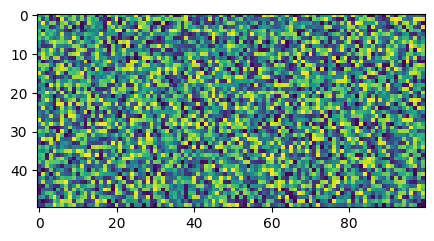

In [7]:
# Heatmap of weights between hidden layer before training
plt.figure(figsize=(5, 5))
plt.imshow(nn.weights0[0])
plt.show()

In [8]:
# Making two types of data with some noise
type1_data = [[array1+np.random.normal(size=100)/10, np.array([1, 0])] for _ in range(250)]
type2_data = [[array2+np.random.normal(size=100)/10, np.array([0, 1])] for _ in range(250)]
data = [*type1_data, *type2_data]

# Normalising the data to sum to zero (and also having standard deviation 1)
mean = np.mean([x[0] for x in data])
stddev = np.std([x[0] for x in data])
data = [[(x[0]-mean)/stddev, x[1]] for x in data]

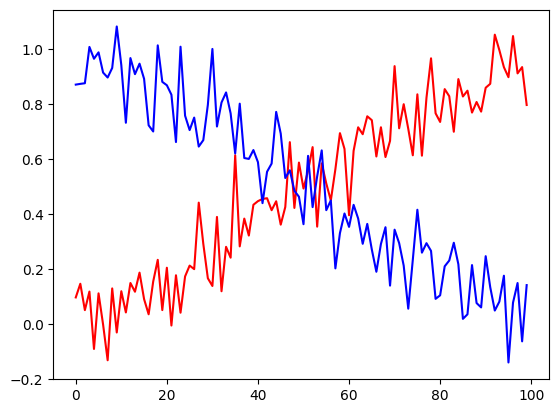

In [9]:
# How the two data types look
plt.figure()
plt.plot(type1_data[0][0], 'r')
plt.plot(type2_data[0][0], 'b')
plt.show()

In [10]:
# Let's train it
for d1, d2 in zip(data, reversed(data)):
    nn.train([d1], 0.1)
    nn.train([d2], 0.1)

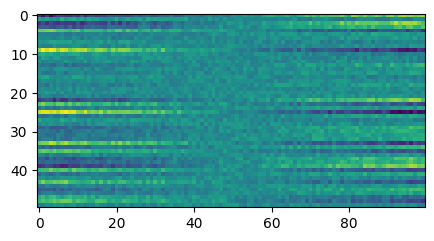

In [11]:
# Heatmap of weights between hidden layer after training
plt.figure(figsize=(5, 5))
plt.imshow(nn.weights[0])
plt.show()

In [12]:
# It already shows improvement, but only slightly...
nn.predict(array1)

array([0.95237644, 0.04762356])

In [13]:
nn.predict(array2)

array([0.05686313, 0.94313687])

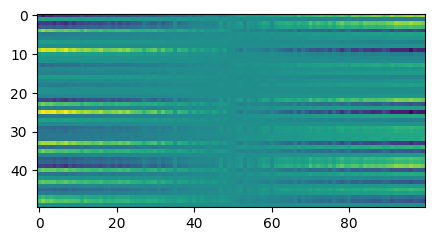

In [14]:
# Heatmap of difference between weights between hidden layer before and after training
plt.figure(figsize=(5, 5))
plt.imshow(nn.weights[0]-nn._weights0[0])
plt.show()